In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
!pip install kaggle


In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mervenurerdogan","key":"ddbde16802377c798832a440f0e80676"}'}

In [4]:
!mkdir –p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600  ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets download -d mysarahmadbhat/lung-cancer

  0% 0.00/2.00k [00:00<?, ?B/s]
100% 2.00k/2.00k [00:00<00:00, 3.86MB/s]


In [6]:
from zipfile import ZipFile
file_name="lung-cancer.zip"

In [7]:
with ZipFile(file_name,'r') as zip:  
  zip.extractall()
  print('done')

done


In [8]:
path=("/content/survey lung cancer.csv")

In [9]:
data=pd.read_csv(path)

In [10]:
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [11]:
print(data.shape) #data boyutu

(309, 16)


In [12]:
print(data.dtypes)

GENDER                   object
AGE                       int64
SMOKING                   int64
YELLOW_FINGERS            int64
ANXIETY                   int64
PEER_PRESSURE             int64
CHRONIC DISEASE           int64
FATIGUE                   int64
ALLERGY                   int64
WHEEZING                  int64
ALCOHOL CONSUMING         int64
COUGHING                  int64
SHORTNESS OF BREATH       int64
SWALLOWING DIFFICULTY     int64
CHEST PAIN                int64
LUNG_CANCER              object
dtype: object


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [14]:
data.isnull().sum().sum()
#null veri sayısı

0

In [15]:
#Kanser durumunu sayısal hale çeviriyoruz
data.replace({"LUNG_CANCER":{'YES':0,'NO':1}},inplace=True)
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,0
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,0
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,1
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,1
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,1


In [16]:
data['LUNG_CANCER'].value_counts()

0    270
1     39
Name: LUNG_CANCER, dtype: int64

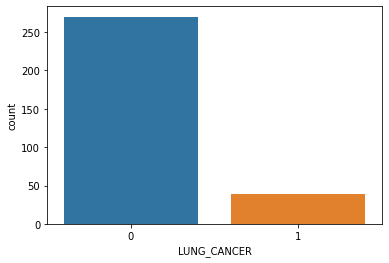

In [17]:
sns.countplot(x='LUNG_CANCER',data=data)
#Yes 0 ,No 1

In [18]:
#cinsiyet sutunun sayısal olrak ifade ediyoruz
data.replace({"GENDER":{'M':0,'F':1}},inplace=True)
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,0
1,0,74,2,1,1,1,2,2,2,1,1,1,2,2,2,0
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2,1
3,0,63,2,2,2,1,1,1,1,1,2,1,1,2,2,1
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1,1


In [19]:
data['GENDER'].value_counts()

0    162
1    147
Name: GENDER, dtype: int64

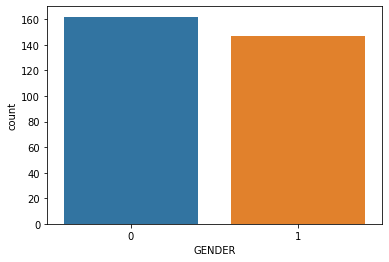

In [20]:
sns.countplot(x='GENDER',data=data)

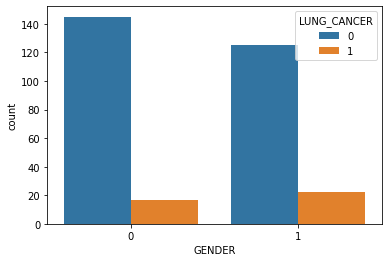

In [21]:
sns.countplot(x='GENDER',hue='LUNG_CANCER',data=data)
#cinsiyete göre kanseli olma durumunun grafikle gösterilmesi
#0 Male ,1 Female

In [22]:
data.corr()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
GENDER,1.000000,-0.021306,-0.036277,0.212959,0.152127,0.275564,0.204606,0.083560,-0.154251,-0.141207,-0.454268,-0.133303,0.064911,0.078161,-0.362958,0.067254
AGE,-0.021306,1.000000,-0.084475,0.005205,0.053170,0.018685,-0.012642,0.012614,0.027990,0.055011,0.058985,0.169950,-0.017513,-0.001270,-0.018104,-0.089465
SMOKING,-0.036277,-0.084475,1.000000,-0.014585,0.160267,-0.042822,-0.141522,-0.029575,0.001913,-0.129426,-0.050623,-0.129471,0.061264,0.030718,0.120117,-0.058179
YELLOW_FINGERS,0.212959,0.005205,-0.014585,1.000000,0.565829,0.323083,0.041122,-0.118058,-0.144300,-0.078515,-0.289025,-0.012640,-0.105944,0.345904,-0.104829,-0.181339
ANXIETY,0.152127,0.053170,0.160267,0.565829,1.000000,0.216841,-0.009678,-0.188538,-0.165750,-0.191807,-0.165750,-0.225644,-0.144077,0.489403,-0.113634,-0.144947
PEER_PRESSURE,0.275564,0.018685,-0.042822,0.323083,0.216841,1.000000,0.048515,0.078148,-0.081800,-0.068771,-0.159973,-0.089019,-0.220175,0.366590,-0.094828,-0.186388
CHRONIC DISEASE,0.204606,-0.012642,-0.141522,0.041122,-0.009678,0.048515,1.000000,-0.110529,0.106386,-0.049967,0.002150,-0.175287,-0.026459,0.075176,-0.036938,-0.110891
FATIGUE,0.083560,0.012614,-0.029575,-0.118058,-0.188538,0.078148,-0.110529,1.000000,0.003056,0.141937,-0.191377,0.146856,0.441745,-0.132790,-0.010832,-0.150673
ALLERGY,-0.154251,0.027990,0.001913,-0.144300,-0.165750,-0.081800,0.106386,0.003056,1.000000,0.173867,0.344339,0.189524,-0.030056,-0.061508,0.239433,-0.327766
WHEEZING,-0.141207,0.055011,-0.129426,-0.078515,-0.191807,-0.068771,-0.049967,0.141937,0.173867,1.000000,0.265659,0.374265,0.037834,0.069027,0.147640,-0.249300


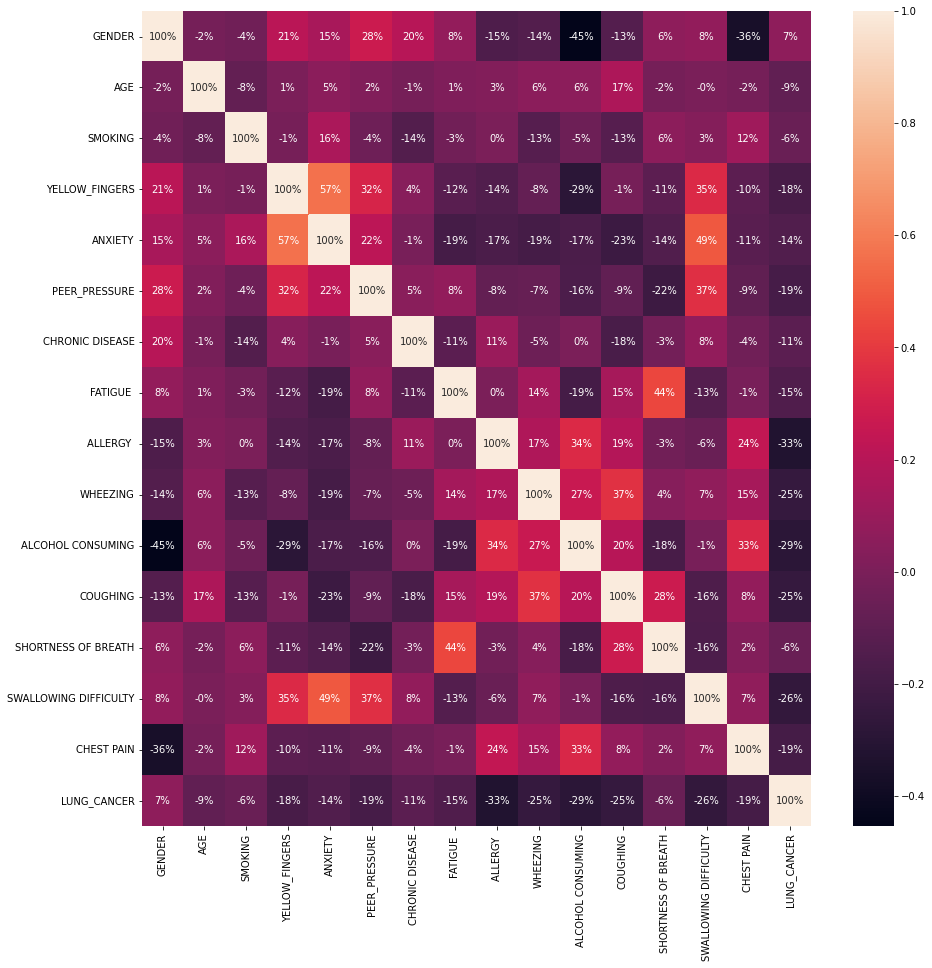

In [23]:
#Corelasyounu görselleştiriyoruz
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True,fmt='.0%')
#değerlerin yüzde ile ifade edilmesi fmt ile oluyor.hetmap fonksiyonu
plt.show()
#coorelasyon değerimiz 0.3 den küçük ise zayıf corelasyon denir
#eğer corelasyon değerimiz 0.7 den büyük ise güçlü korelasyon denir
#Yüksek korelasyona sahip veriler bize sağlıklı bilgiler verir

MODEL BUILD


In [24]:
X=data.drop(columns=['LUNG_CANCER'],axis=1) #eğitim verileri
y=data['LUNG_CANCER'] #Sınıflandırma etiketi

In [25]:
print("X'in boyutu " , X.shape)
print("y' nin boyutu " , y.shape)

X'in boyutu  (309, 15)
y' nin boyutu  (309,)


In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=68)

In [28]:
print("X_train'in boyutu",X_train.shape)
print("X_test 'in boyutu ",X_test.shape)
print("Y_train'in boyutu ",Y_train.shape)
print("Y_test'in boyutu ",Y_test.shape)

X_train'in boyutu (247, 15)
X_test 'in boyutu  (62, 15)
Y_train'in boyutu  (247,)
Y_test'in boyutu  (62,)


In [29]:
#y_train ve y_test'in toplam değerleri
print("y_train toplam  \n",Y_train.value_counts())
print("y_test toplam \n",Y_test.value_counts())

y_train toplam  
 0    216
1     31
Name: LUNG_CANCER, dtype: int64
y_test toplam 
 0    54
1     8
Name: LUNG_CANCER, dtype: int64


**Feature Scaling**

>


Verimize Feature Scaling yapıyoruz yani özelliklerimizi belli Scaller metodlarala ölçelendirmiş olacağız

In [30]:
from sklearn.preprocessing import StandardScaler


In [31]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [32]:
X_train

array([[ 1.05409255, -0.3560103 ,  0.88873791, ...,  0.76376262,
        -0.93338744, -1.09788758],
       [-0.9486833 ,  0.78599677,  0.88873791, ...,  0.76376262,
        -0.93338744,  0.91084007],
       [ 1.05409255,  1.29355547,  0.88873791, ...,  0.76376262,
         1.07136646,  0.91084007],
       ...,
       [-0.9486833 ,  0.02465872, -1.12519112, ...,  0.76376262,
        -0.93338744, -1.09788758],
       [ 1.05409255, -0.3560103 , -1.12519112, ...,  0.76376262,
        -0.93338744,  0.91084007],
       [-0.9486833 , -0.99045867, -1.12519112, ...,  0.76376262,
        -0.93338744,  0.91084007]])

**RandomForest**

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report



In [34]:
forest=RandomForestClassifier(n_estimators=10,criterion="entropy",random_state=68)
forest.fit(X_train,Y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=68)

In [35]:
y_pred=forest.predict(X_test)

In [36]:
forest_train_acc=accuracy_score(Y_train,forest.predict(X_train))
forest_test_acc=accuracy_score(Y_test,y_pred)

In [37]:
print(f"Random Forest Tree Model Eğitim Verileri Doğruluk  {forest_train_acc}")
print(f"Random Forest  Model Test Verileri Doğruluk {forest_test_acc}")

Random Forest Tree Model Eğitim Verileri Doğruluk  0.9878542510121457
Random Forest  Model Test Verileri Doğruluk 0.9516129032258065


In [38]:
conf_matrix=confusion_matrix(Y_test, y_pred)
conf_matrix

array([[52,  2],
       [ 1,  7]])

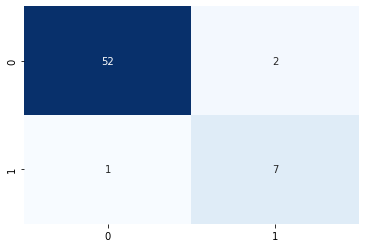

In [39]:
sns.heatmap(conf_matrix,annot=True,cmap='Blues',fmt='g',cbar=False)

In [40]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        54
           1       0.78      0.88      0.82         8

    accuracy                           0.95        62
   macro avg       0.88      0.92      0.90        62
weighted avg       0.95      0.95      0.95        62

